In [2]:
"""
Spread of forest fires and infectious disease
The project aims to create a simple model to simulate forest fires.
"""
import numpy as np
import pylab as plt
import matplotlib
import matplotlib.animation as animation

Matplotlib is building the font cache; this may take a moment.


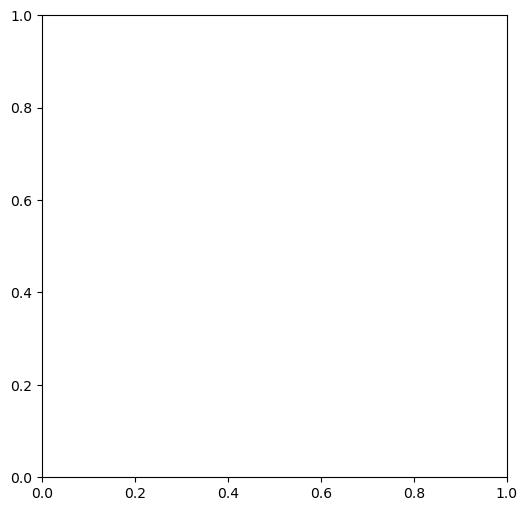

In [4]:
#Size of the forest
Nx = 250
Ny = 250

#Creat a matrix representing the forest
forest = 1*np.ones((Nx,Ny),dtype=int)

# Setup colors for plotting
colorsList = ['gray','green','red']
forest_cmap = matplotlib.colors.ListedColormap(colorsList)

# Probablities for empty spots and trees on fire.
p_bare = 0.225
p_fire = 0.000025

# Probability the fire spreads to adjacent spots.
p_spread = 0.7

#Initialize the variables
fires = 0
grounds = 0
trees = Nx*Ny-fires-grounds
t = 0

#Initialize the lists to track the changes of the variables
fire_list = []
ground_list = []
tree_list = []
t_list = []
images = []

#Create an empty canvas
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

#0 represents bare ground
#1 represents trees not burning
#2 represents trees that are already fired
#3 represents trees just caught fire in the current step

#Define a function for referring to the 4 neighbors of a center spot
def neighbors(i,j):
    return (i,j-1),(i,j+1),(i-1,j),(i+1,j)

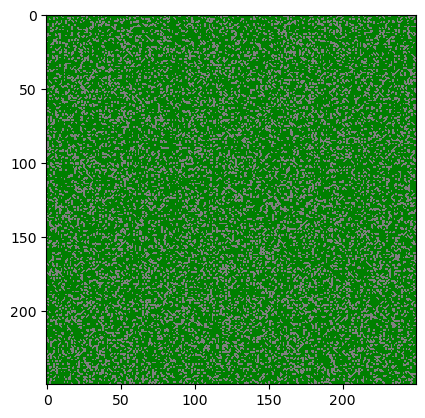

In [6]:
#Set some bare ground at the begining
for i in range(0,Nx):
    for j in range(0,Nx):
        if np.random.rand(1,1) < p_bare:
            forest[i,j] = 0
            grounds = grounds + 1
            trees = trees - 1

ground_list.append(grounds)
tree_list.append(trees)
fire_list.append(fires)
t_list.append(t)

#Store the first frame in a collection of images
im = ax.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2)                
images.append([im])

plt.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2) 

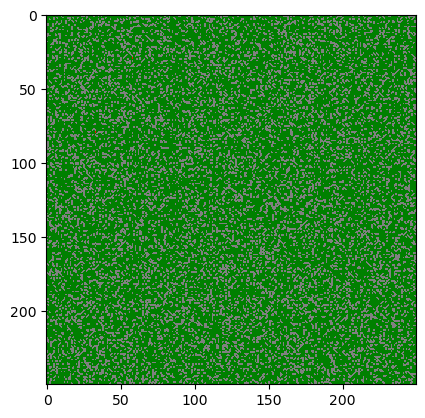

In [8]:
#Set some initial fires randomly
while fires == 0:
    for i in range(0,Nx):
        for j in range(0,Nx):
            #Only forests can get fires
            if forest[i,j] == 1:
                if np.random.rand(1,1) < p_fire:
                    forest[i,j] = 2
                    fires = fires + 1
                    trees = trees - 1
t = t + 1 

ground_list.append(grounds)
tree_list.append(trees)
fire_list.append(fires)
t_list.append(t)

#Store the second frame in the collection of images
im = ax.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2)                
images.append([im])

plt.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2) 
fig.savefig('t='+str(t)+'.png')


In [10]:
#Set neighbors nodes on fire based on the probability of spreading, then turn the burnt out nodes into bare ground
while fires > 0:
    for i in range(0,Nx):
        for j in range(0,Nx):
            if forest[i,j] == 2:
                #fire spreads to neighbors
                for x,y in neighbors(i,j):
                    if (x>=0) & (x<=Nx-1) & (y>=0) & (y<=Ny-1):
                        if forest[x,y] == 1:
                            if np.random.rand(1,1) < p_spread:
                                forest[x,y] = 3
                                fires = fires + 1
                                trees = trees - 1
                #Burnt nodes become bare ground          
                forest[i,j] = 0
                fires = fires - 1
                grounds = grounds + 1
                
                
    #The nodes that were ignited in the last step are now considered as nodes that are already on fire in the new step.
    for i in range(0,Nx):
        for j in range(0,Nx):
                if forest[i,j] == 3:
                    forest[i,j] = 2
                    
    t = t + 1
    print(t)
    
    ground_list.append(grounds)
    tree_list.append(trees)
    fire_list.append(fires)
    t_list.append(t)
    
    #Store the frames of fire-spreading process in the collection of images                    
    im = ax.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2)                
    images.append([im])
    
    #Save the images every 20 iterations
    if t%20 == 1:
        fig.savefig('t='+str(t)+'.png')

print('Done')

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

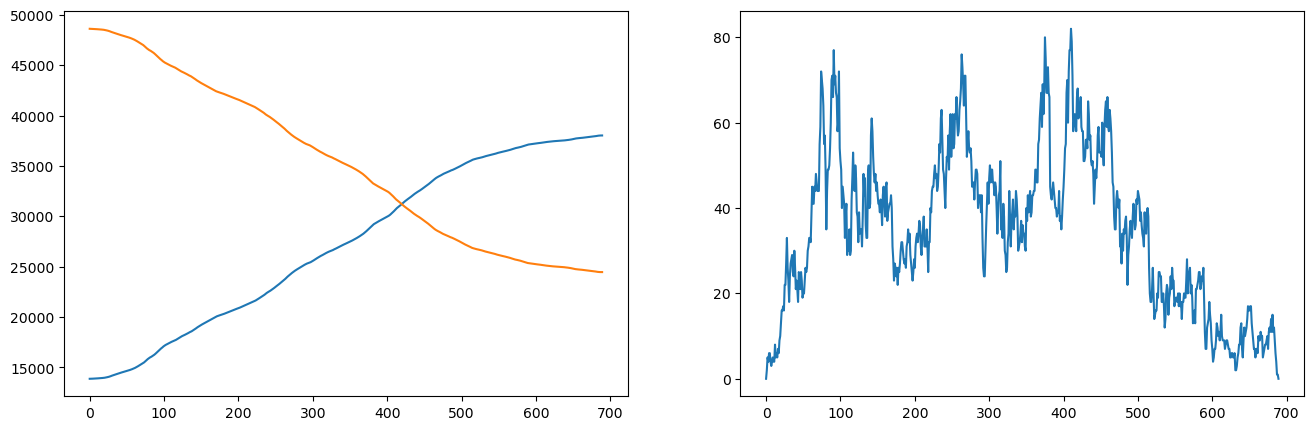

In [12]:
#Illustrate how the total number of nodes of bare ground, trees and fire change with ongoing iteration
fig_1 = plt.figure(figsize=(16,5))
ax1=plt.subplot(1,2,1)   
plt.plot(t_list,ground_list,tree_list)
ax2=plt.subplot(1,2,2)   
plt.plot(t_list,fire_list)
fig_1.savefig('spreading'+str(p_spread)+'.png')

In [14]:
#Create the animation of forest fire and save as .gif
ani = animation.ArtistAnimation(fig,images, interval=100,blit=False)
ani.save('Forest_Fire.gif',writer = 'pillow')
plt.show() 